In [1]:
%load_ext autoreload
%autoreload 2

from ff_energy.ffe.utils import read_from_pickle, PKL_PATH


from ff_energy.ffe.bonded_terms import harmonic_angle
from ff_energy.ffe.bonded_terms import harmonic

from ff_energy.ffe.potential import LJ
from ff_energy.ffe.ff import FF
import numpy as np
from ff_energy.ffe.data import Data  # , plot_ecol, plot_intE
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import pandas as pd

# from ff_energy.utils import *
from ff_energy.ffe.data import Data
from ff_energy.ffe.plot import plot_energy_MSE

sig_bound = (0.5, 4.0)
ep_bound = (0.00001, 1.0)
LJ_bound = [(sig_bound), (sig_bound), (ep_bound), (ep_bound)]

In [2]:
# example
# dataname = "water_cluster/pbe0dz/pbe0_dz.pc"

In [3]:
# Parameters
dataname = "water_cluster/pbe0dz/pbe0_dz.pc"


#  Load data

In [4]:
p = PKL_PATH / dataname
data_ = Data(p)

output_path /home/boittier/Documents/phd/ff_energy/pickles/water_cluster/pbe0dz/pbe0_dz.pc
loading pickles from  /home/boittier/Documents/phd/ff_energy/pickles/water_cluster/pbe0dz/pbe0_dz.pc
Strcuture,PDB already already exists, loading structure from pickle
Index(['m_ENERGY', 'KEY', 'key', 'monomer', 'a', 'r1', 'r2'], dtype='object')
Index(['m_ENERGY', 'monomer', 'a', 'r1', 'r2'], dtype='object')
Fitting parameters: kb, ka, r0, a0


/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/bonded_terms.py:77: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_monomer_df = self.df.groupby(


df Index(['m_ENERGY', 'KEY', 'key', 'monomer', 'a', 'r1', 'r2'], dtype='object')
sum_monomer_df Index(['m_ENERGY', 'monomer', 'a', 'r1', 'r2', 'E_pred', 'SE', 'm_E_tot',
       'p_m_E_tot'],
      dtype='object')


/home/boittier/Documents/phd/ff_energy/ff_energy/ffe/bonded_terms.py:96: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  self.sum_monomer_df = self.get_loss_df(self.x).groupby(


#  Plot Fits

In [5]:
data_.__dict__.keys()

dict_keys(['system', 'output_path', 'output', 'data', 'coloumb', 'ctot', 'chm_df', 'monomers_df', 'monomer_df', 'cluster_df', 'pairs_df', 'structures', 'pdbs', 'structure_key_pairs', 'min_m_E', 'bonded_fit'])

In [6]:
# data_.output

In [7]:
data_.data

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,n_pairs,intE,P_intE,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol
test467,-113.436686,test467,21.55483,-53.42358,14.82881,test467,-1527.154217,test467,20,-1527.236629,190,-51.714066,-50.297664,958349.117867,-958295.211613,-958345.566652
test263,-159.213355,test263,19.76551,-80.17211,20.54380,test263,-1527.156016,test263,20,-1527.258259,190,-64.157783,-66.601357,958347.989140,-958296.144723,-958359.139096
test35,-138.530827,test35,22.57516,-66.12227,11.05221,test35,-1527.143158,test35,20,-1527.258584,189,-72.430230,-65.790457,958356.057316,-958288.376060,-958359.343368
test223,-85.840765,test223,23.27997,-40.47928,6.72946,test223,-1527.147556,test223,20,-1527.203106,190,-34.857221,-39.243367,958353.297326,-958290.449867,-958324.530348
test254,-157.431989,test254,24.42066,-82.00400,21.85417,test254,-1527.135568,test254,20,-1527.237145,188,-63.739697,-57.830990,958360.820083,-958283.041923,-958345.890067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test100,-120.244324,test100,23.76369,-66.03681,19.45476,test100,-1527.141372,test100,20,-1527.210157,190,-43.162995,-42.125801,958357.178250,-958287.528329,-958328.955198
test304,-123.903711,test304,21.68895,-69.20978,17.28253,test304,-1527.150985,test304,20,-1527.239633,189,-55.626955,-54.710834,958351.146070,-958293.116887,-958347.451339
test327,-195.846922,test327,19.73276,-103.42656,31.12436,test327,-1527.154084,test327,20,-1527.300559,190,-91.913853,-79.340573,958349.201570,-958295.335953,-958385.682737
test185,-114.232038,test185,24.07288,-60.27765,11.20177,test185,-1527.144999,test185,20,-1527.232387,190,-54.835874,-54.451833,958354.901870,-958289.053296,-958342.904458


##  Coulomb energy

2.5608014994581034e-245


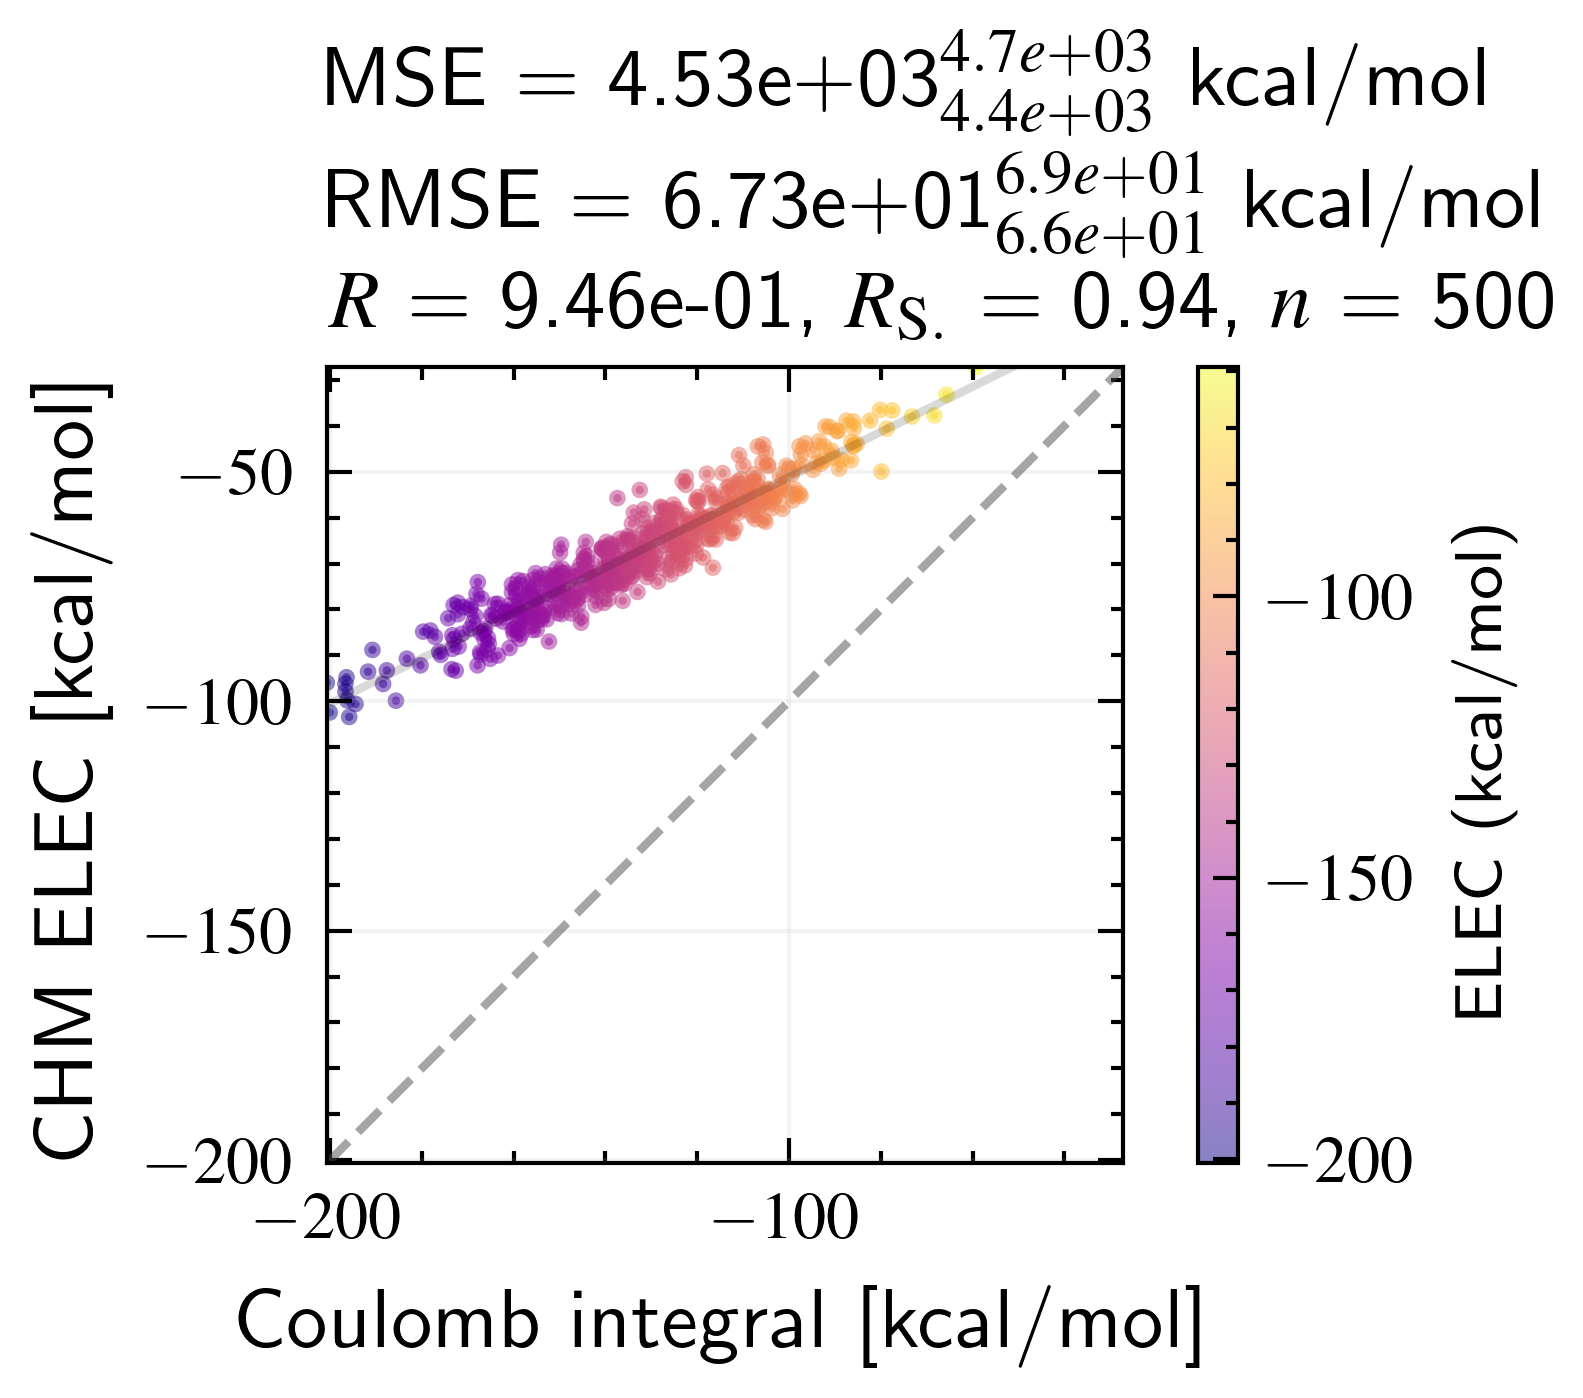

In [8]:
data_.plot_ecol()


## Interaction Energy (no fit)

2.2947009120687146e-213


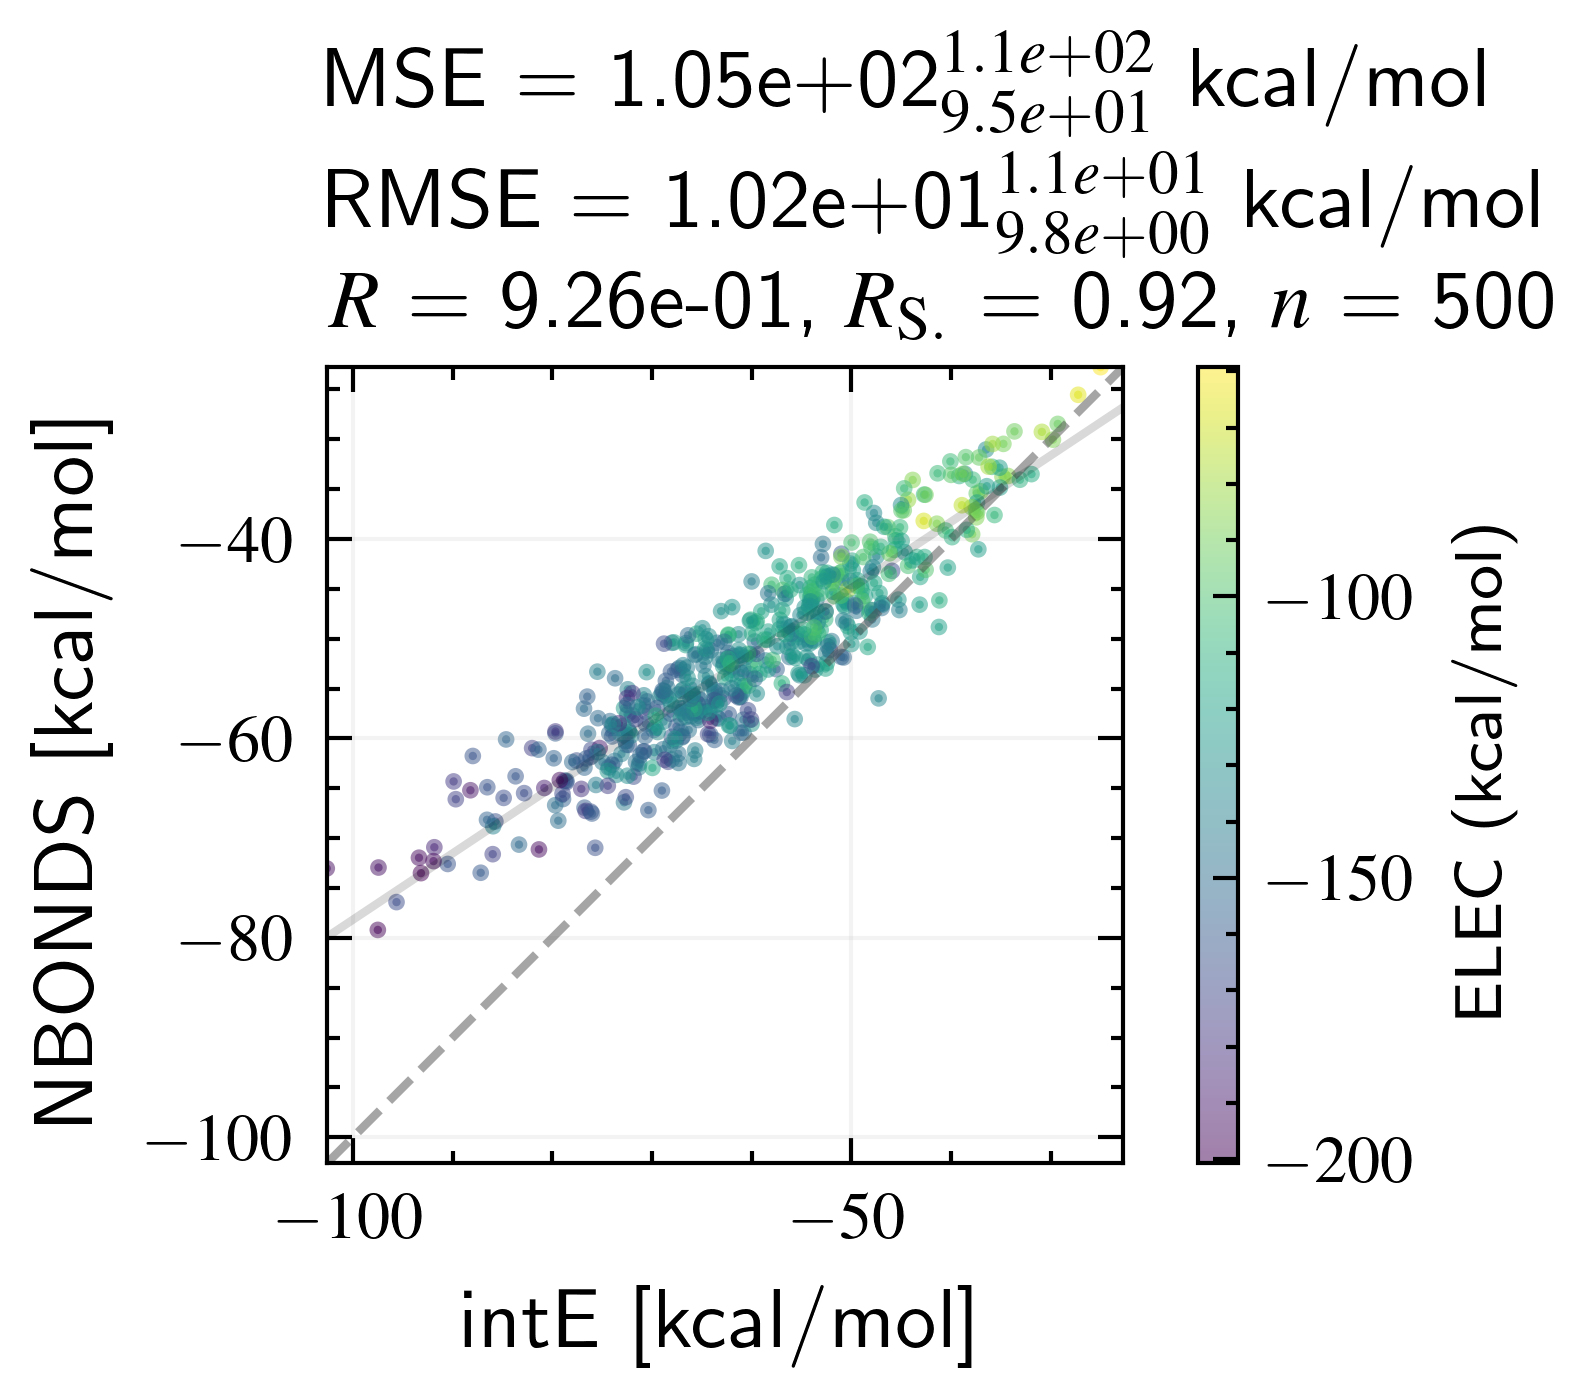

In [9]:
data_.plot_intE()


##  Monomer energies


0.0


/tmp/ipykernel_101251/3718939681.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  int_fit.groupby("key").mean().sum()
/tmp/ipykernel_101251/3718939681.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _ = int_fit.groupby("key").mean()


(<Axes: xlabel='(Average) Monomer Energy', ylabel='Fitted (Average) \nMonomer Energy (harmonic)'>,
 {'MSE': 1.5987744230183236,
  'RMSE': 1.264426519422273,
  'R': 0.9949823864419933,
  'RS': 0.9940967443869776,
  'n': 500,
  'slope': 1.047886925966984,
  'intercept': -2.6538358434775304})

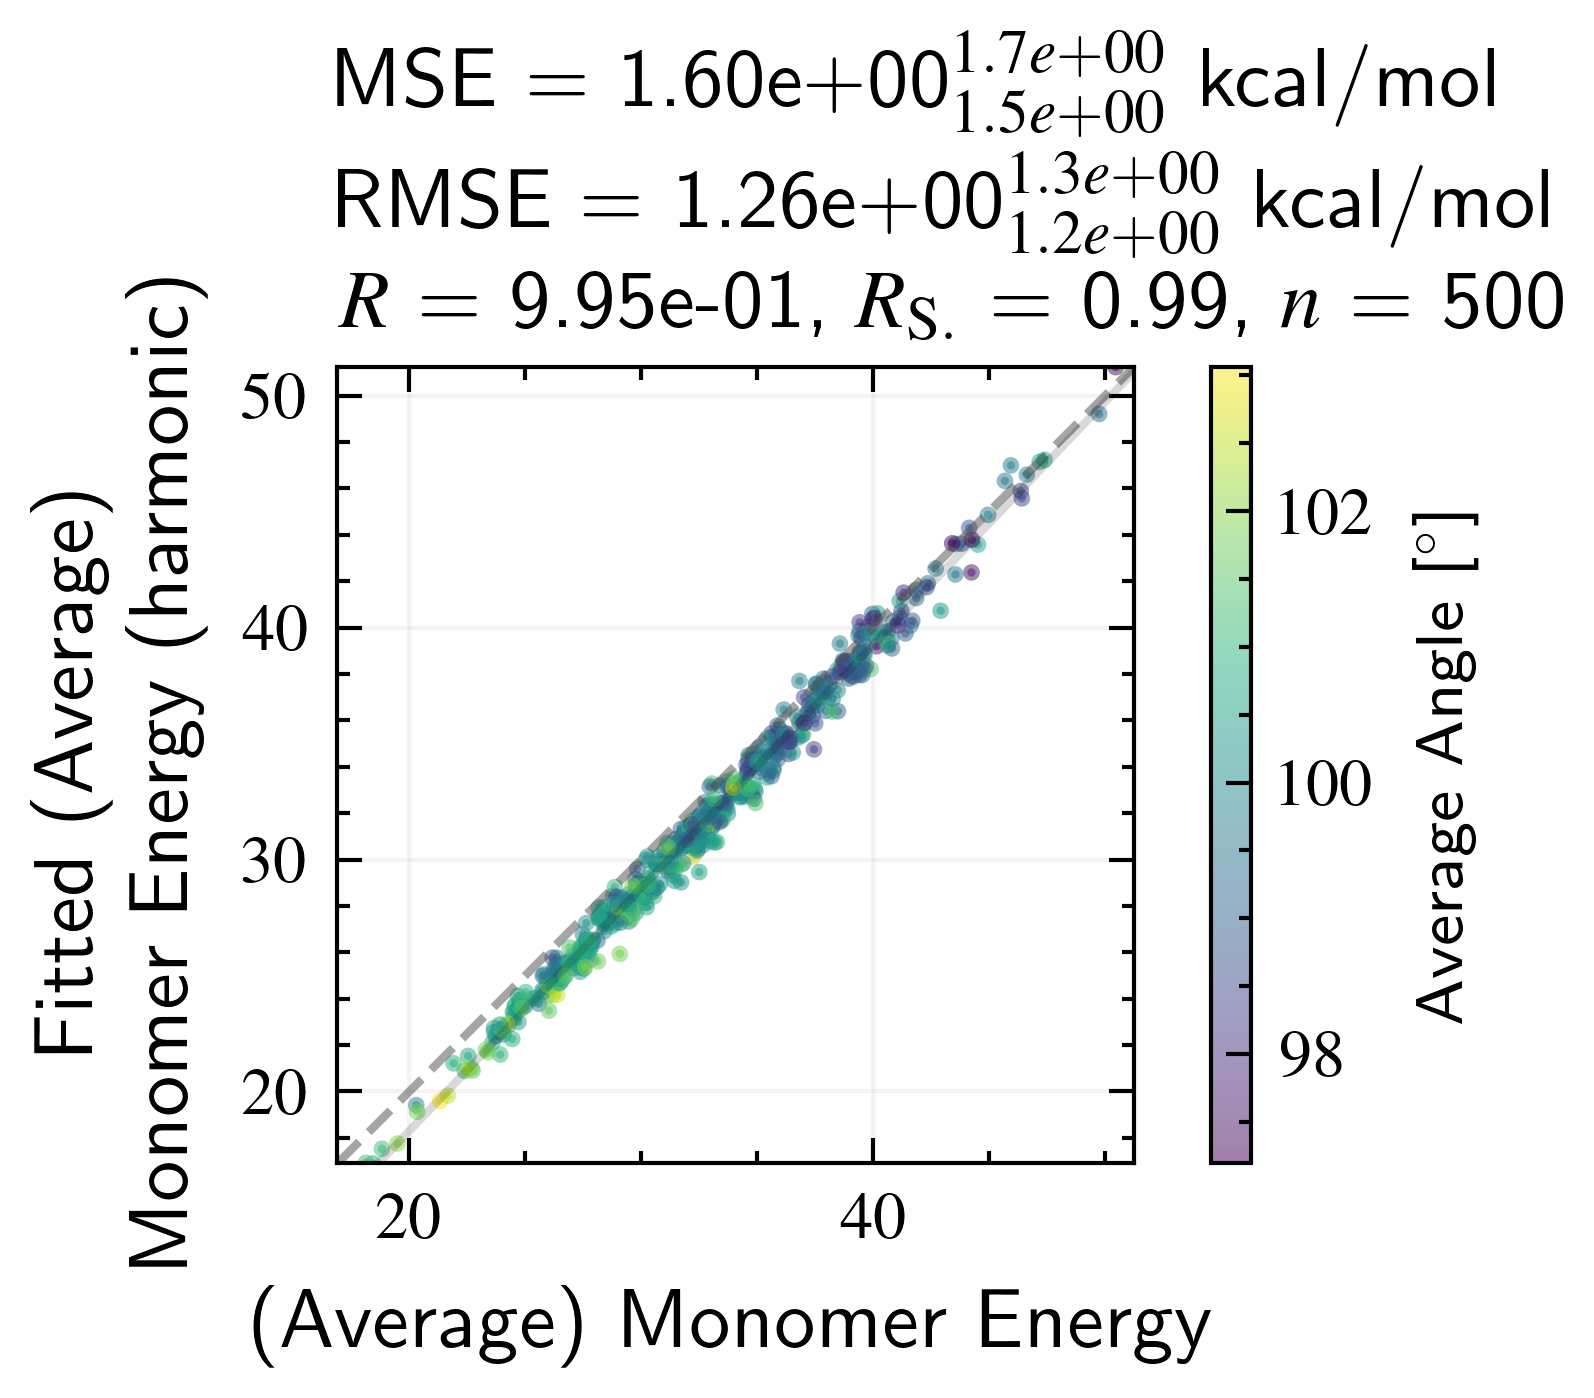

In [10]:
int_fit = data_.bonded_fit.get_loss_df(data_.bonded_fit.x)
int_fit.groupby("key").mean().sum()
_ = int_fit.groupby("key").mean()
_["a"] = _["a"] 
_["m_ENERGY"] = _["m_ENERGY"] * 20
_["E_pred"] = _["E_pred"] * 20 
plot_energy_MSE(_, "m_ENERGY", "E_pred", elec="a",
               xlabel="(Average) Monomer Energy",
               ylabel="Fitted (Average) \nMonomer Energy (harmonic)",
               cbar_label="Average Angle [$^{\circ}$]")



In [1]:
0.15 * 20

3.0

0.0


(<Axes: xlabel='Monomer Energy', ylabel='Fitted Monomer \nEnergy (harmonic)'>,
 {'MSE': 0.02310860626988134,
  'RMSE': 0.15201515144840444,
  'R': 0.9947078244271976,
  'RS': 0.996908192774173,
  'n': 10000,
  'slope': 1.044714234089175,
  'intercept': -0.12752043170743455})

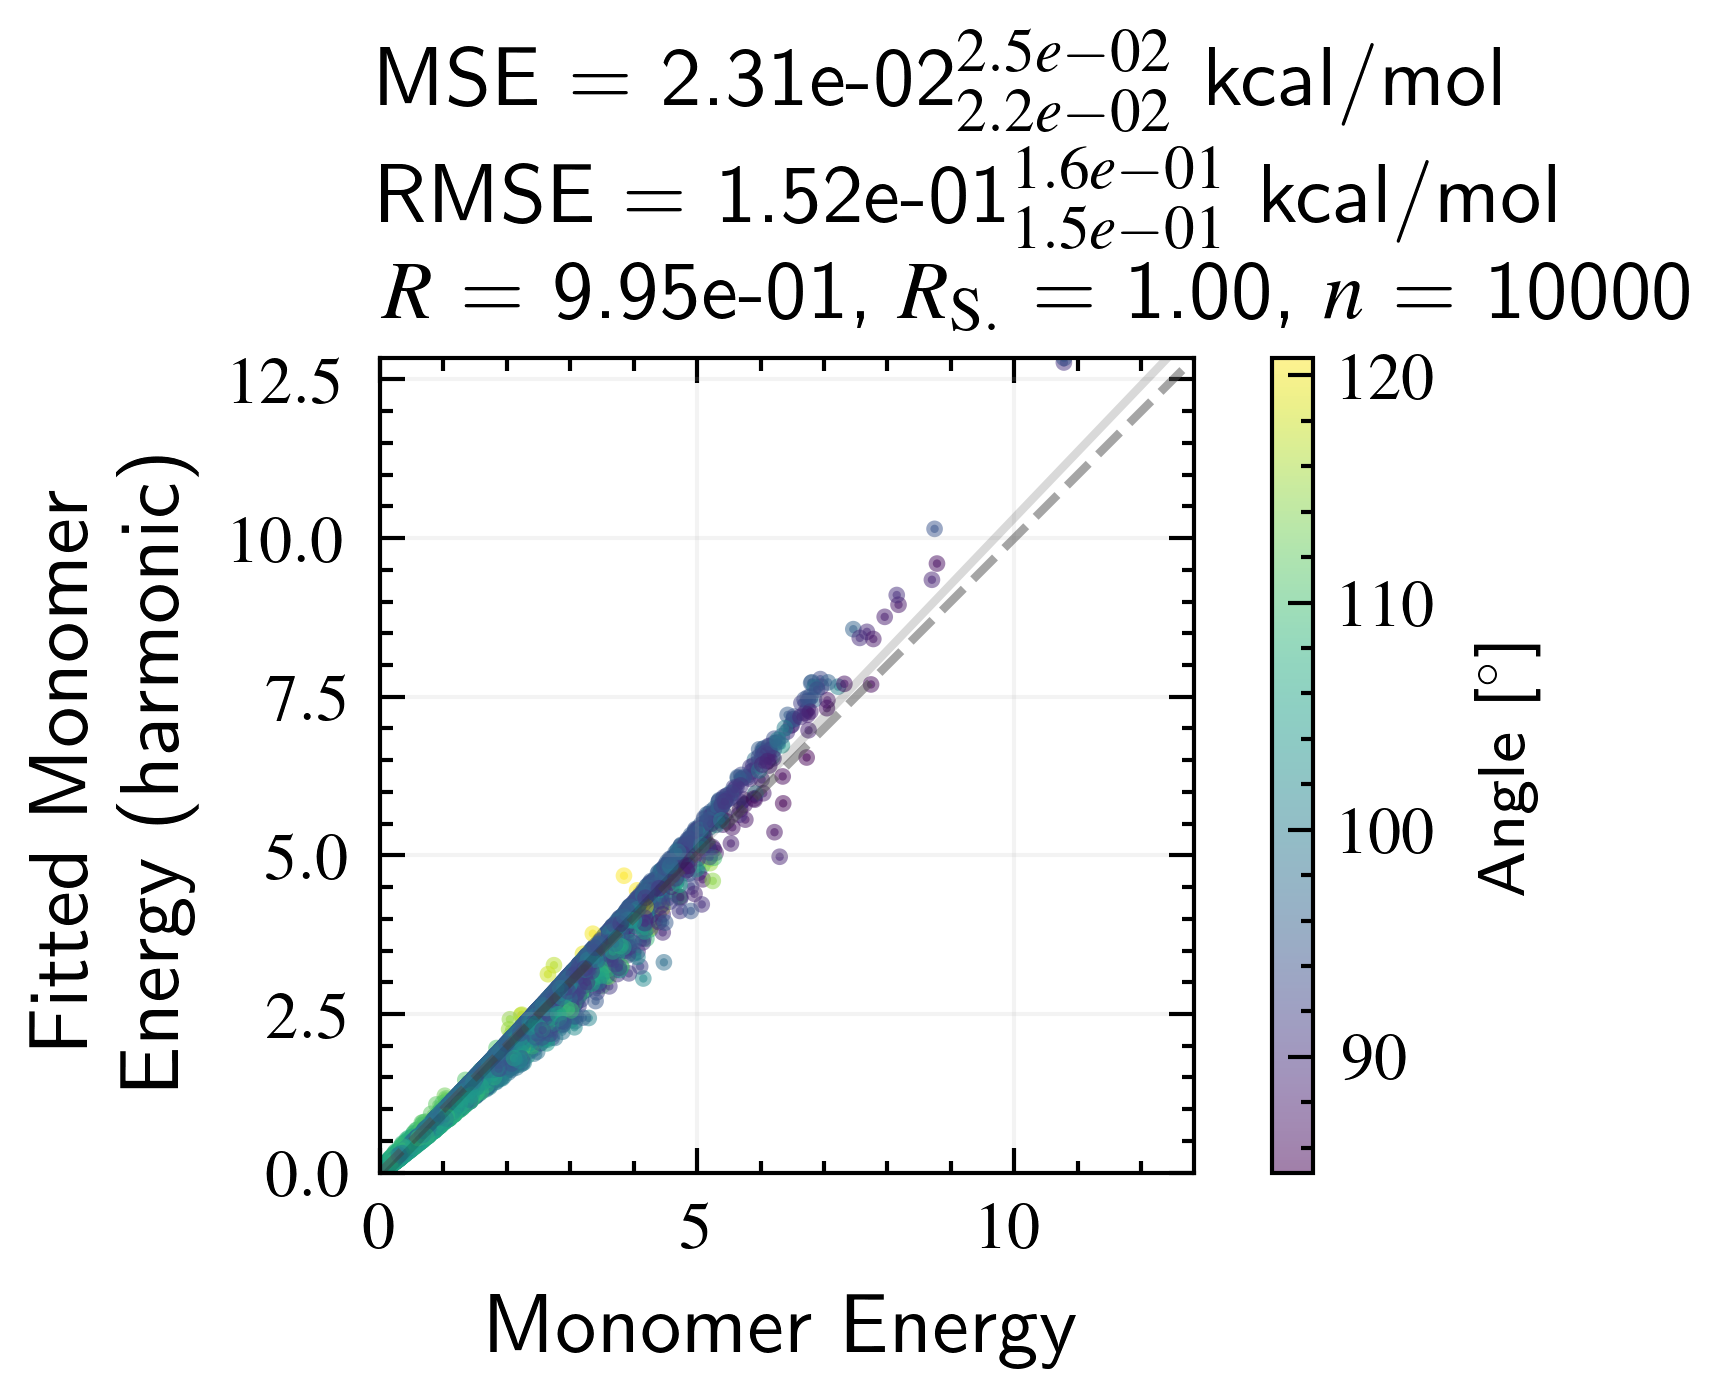

In [11]:
plot_energy_MSE(int_fit, "m_ENERGY", "E_pred", elec="a",
               xlabel="Monomer Energy",
               ylabel="Fitted Monomer \nEnergy (harmonic)",
               cbar_label="Angle [$^{\circ}$]")

### Angles

[1.04281047e+03 9.74776583e+01 9.63386601e-01 1.82033169e+00]


Text(0.5, 0, 'Angle [$^{\\circ}$]')

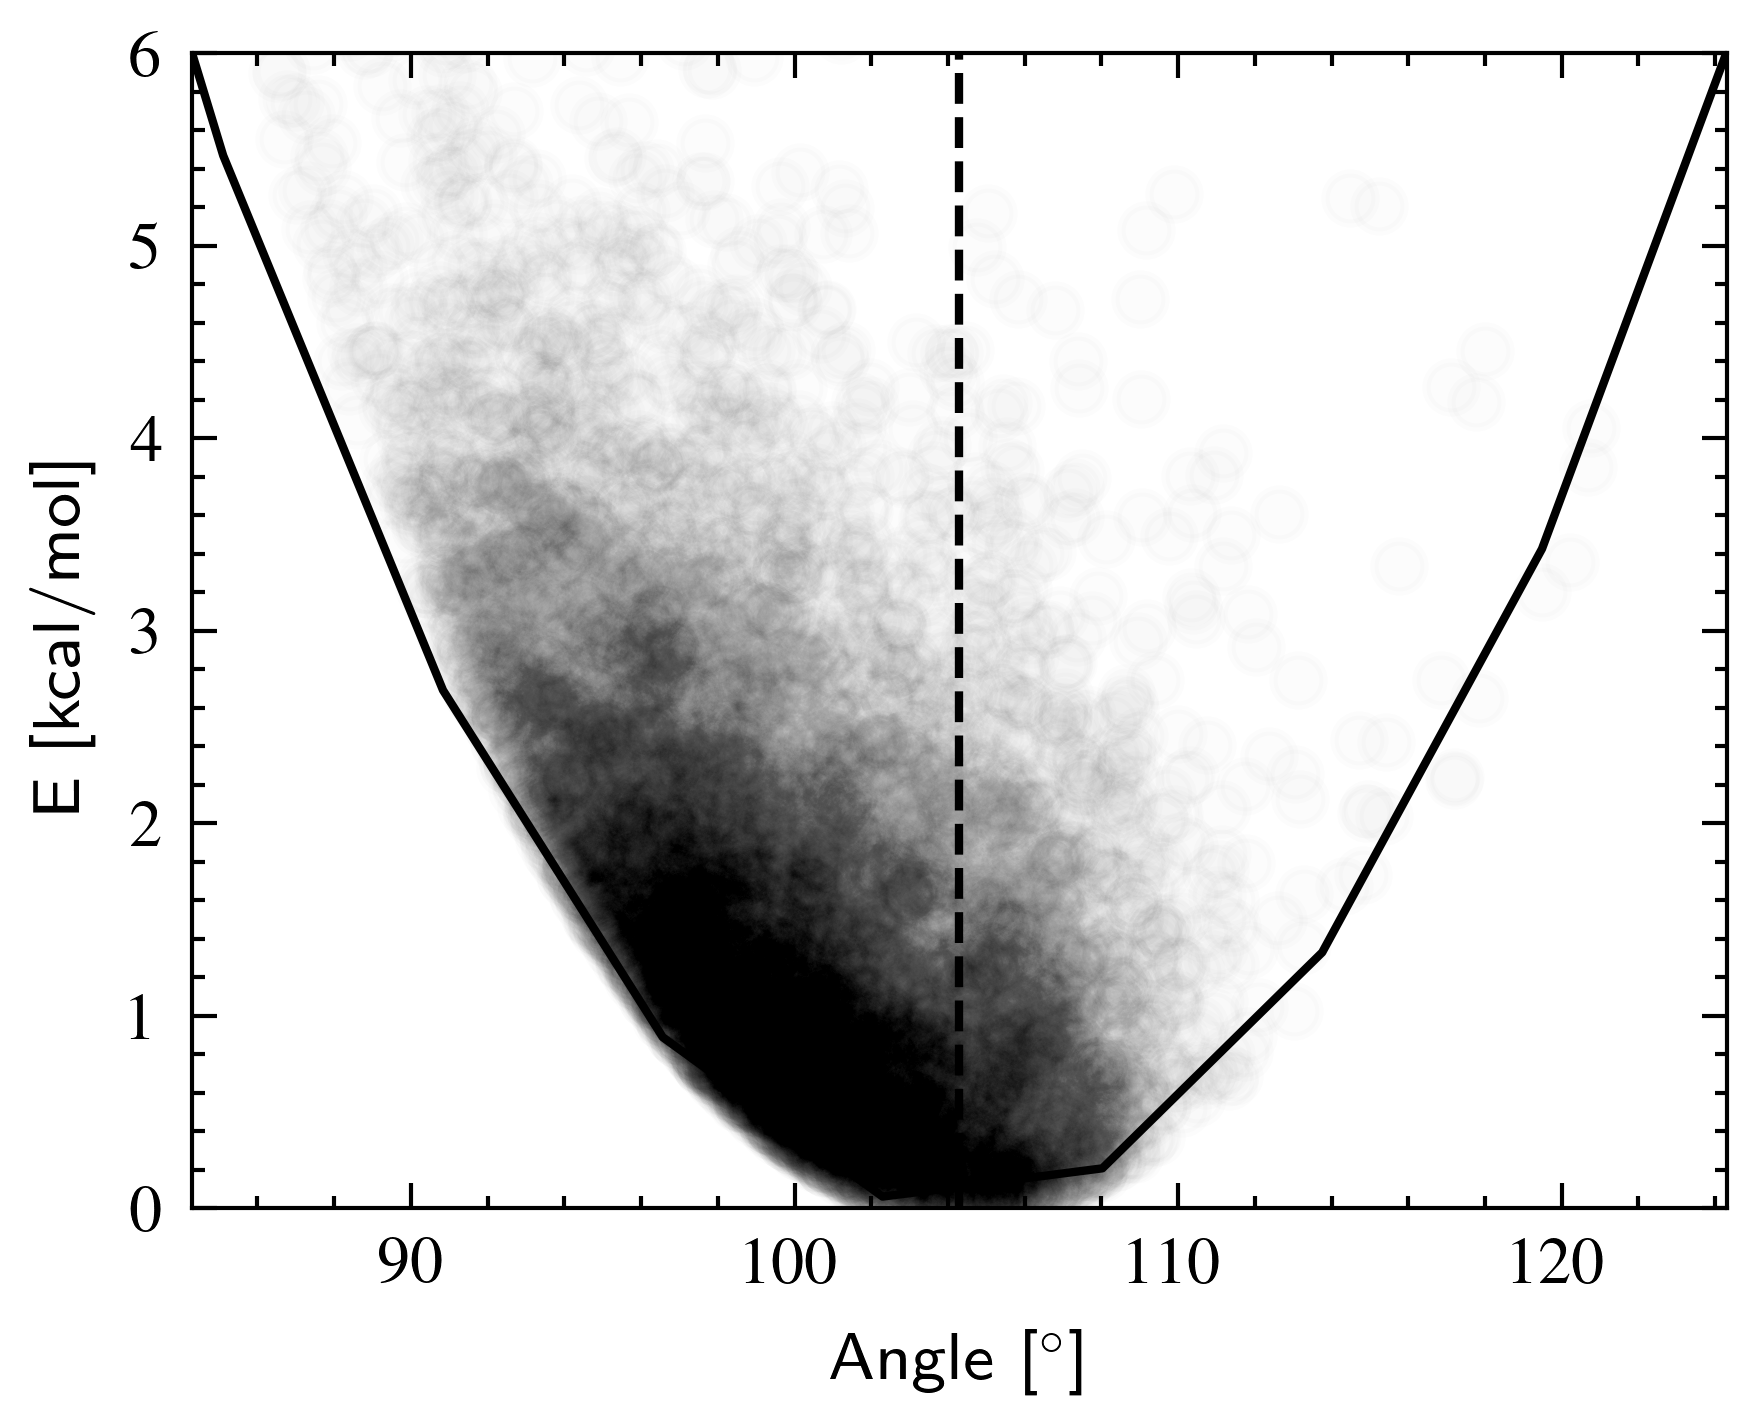

In [12]:
#  fit result
res = data_.bonded_fit.x
print(res)
#  angle range for plotting
xrange = np.arange(np.pi / 4, np.pi, 0.1)
#  harmonic approx.
yvals = harmonic_angle(xrange, res[1], res[3])
#  plotting
plt.plot(np.rad2deg(xrange), yvals)
plt.scatter(int_fit["a"], 
            int_fit["m_ENERGY"], alpha=0.01, c="k")

plt.axvline(np.rad2deg(res[3]), linestyle="--")

plt.xlim(np.rad2deg(res[3])-20,np.rad2deg(res[3])+20)
plt.ylim(0,6)
plt.ylabel("E [kcal/mol]")
plt.xlabel("Angle [$^{\circ}$]")

### Bonds

Text(0.5, 0, '$r$ [$\\mathrm{\\AA}$]')

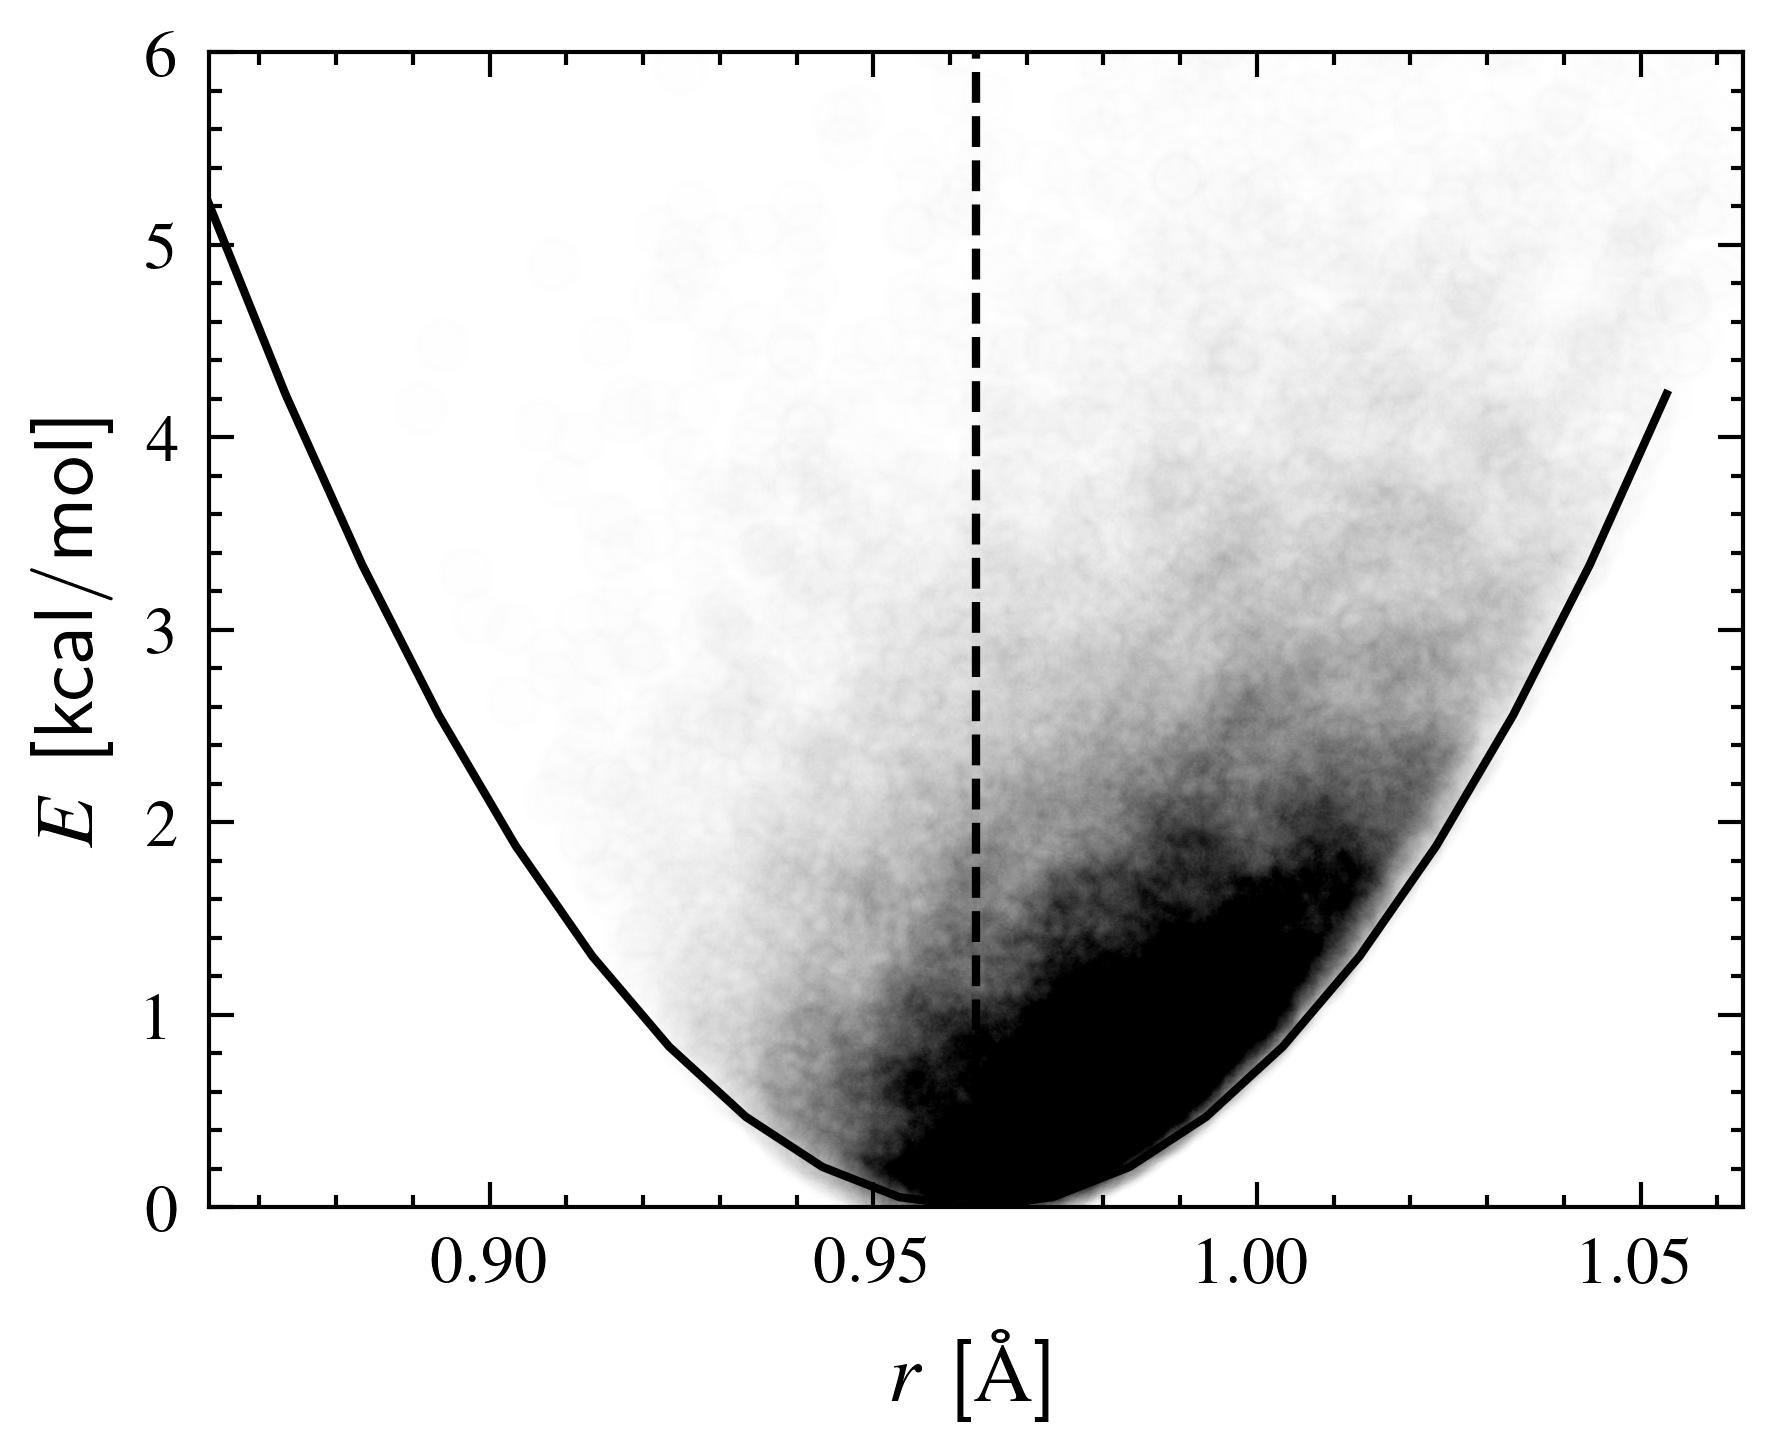

In [13]:
from ff_energy.ffe.bonded_terms import harmonic_angle
from ff_energy.ffe.bonded_terms import harmonic

#  fit result
res = data_.bonded_fit.x
#  angle range for plotting
xrange =  np.arange(res[2]-0.1, res[2]+0.1, 0.01)
#  harmonic approx.
yvals = harmonic(xrange, res[0], res[2])
#  plotting
plt.plot(xrange, yvals)
plt.scatter(int_fit["r1"], 
            int_fit["m_ENERGY"], alpha=0.005, c="k")
plt.scatter(int_fit["r2"], 
            int_fit["m_ENERGY"], alpha=0.005, c="k")
plt.xlim(res[2]-0.1, res[2]+0.1)
plt.axvline(res[2], linestyle="--")
plt.ylim(0,6)
plt.ylabel("$E$ [kcal/mol]",fontsize=10)
plt.xlabel("$r$ [$\mathrm{\AA}$]",fontsize=10)

## Pair vs. Cluster Interaction Energy

n: 393
8.905163484181679e-239


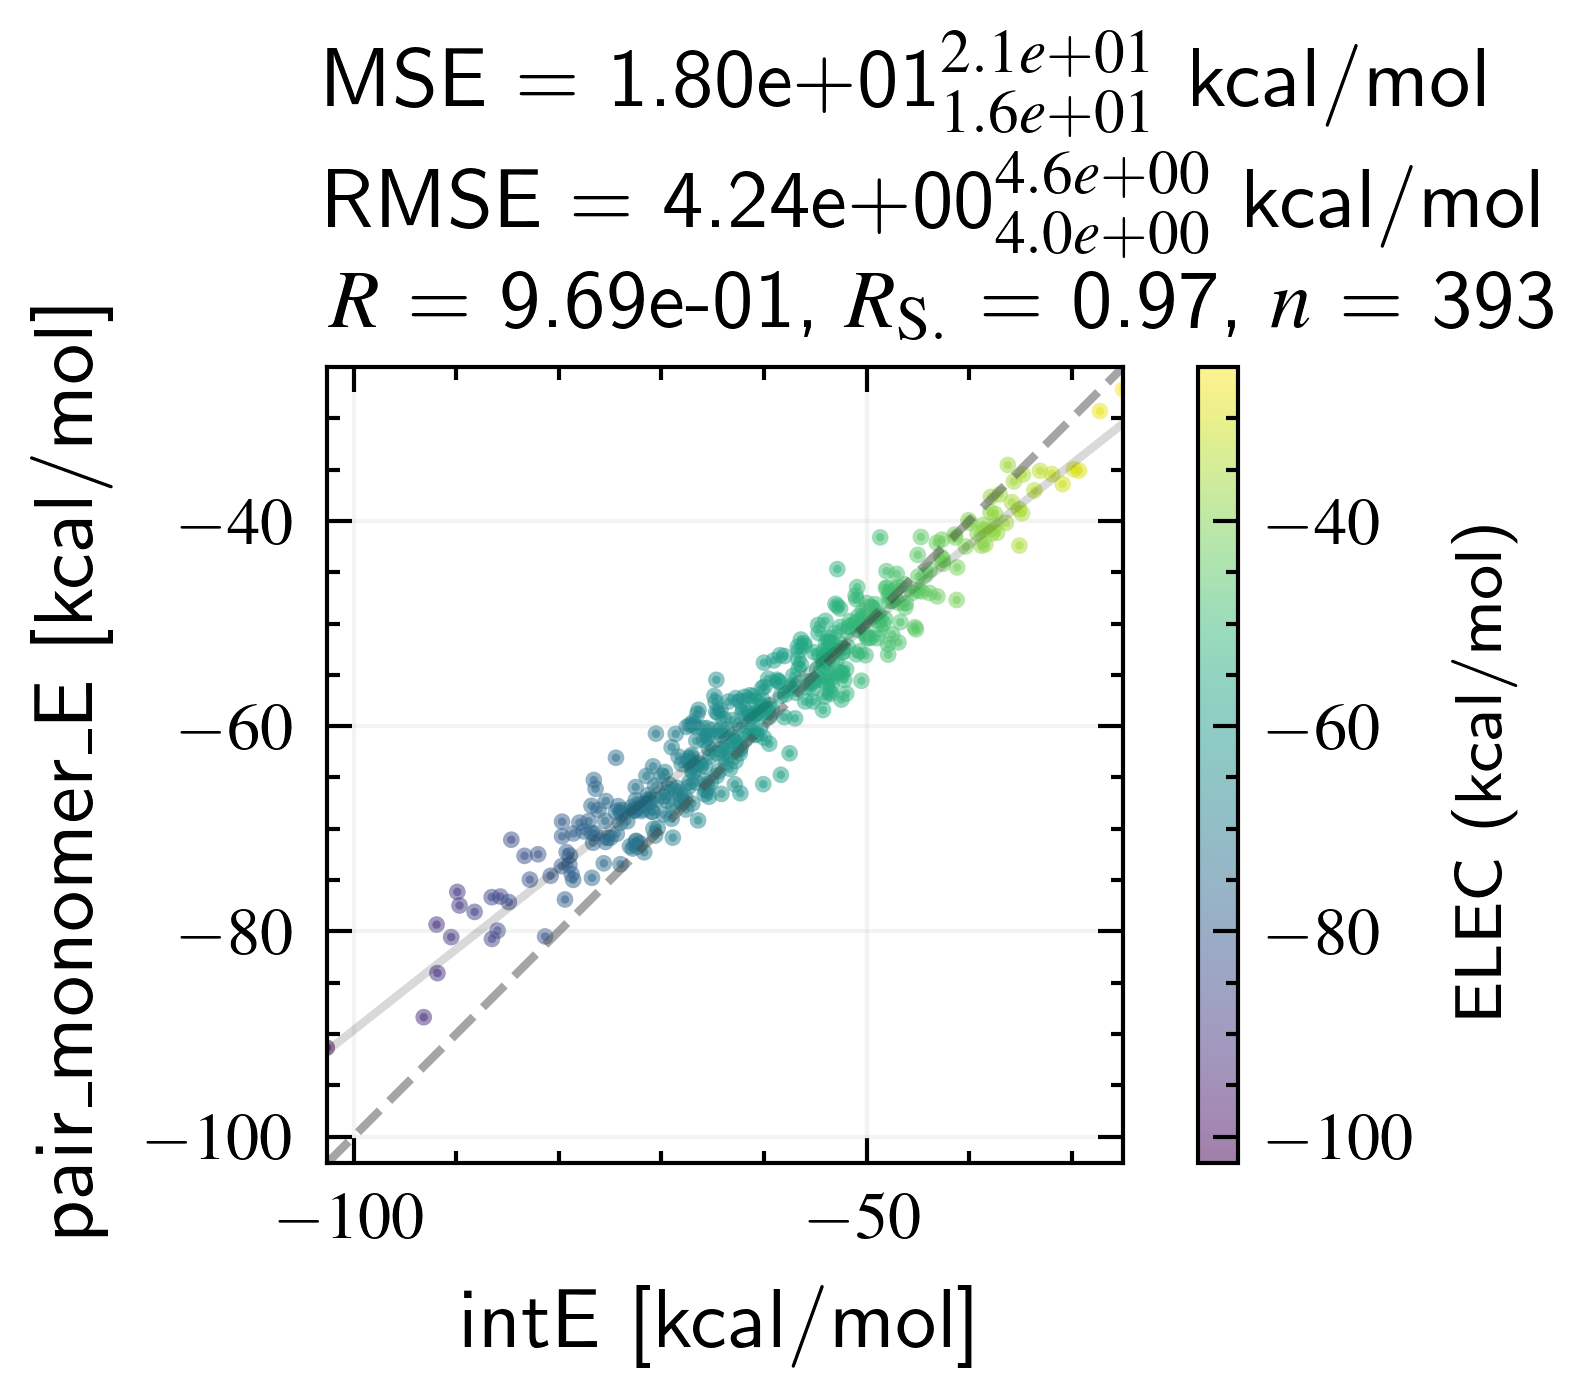

In [14]:
data_.plot_pair_monomer_E()